## Check DIGIs

In [6]:
#read the original ROOT files and get a summary DataFrame of what's relevant

import os
import ROOT
import pandas as pd
import PyRDF
import numpy as np

runLocal=True #switch local/spark
file='/eos/cms/store/cmst3/user/psilva/HGCAL/EOL/2021-02-19/ttbar_digis.root' #input file
ran=None #event range

cols=['event','side','layer','u','v','mipsim','miprec','thick','cce','isTOT']

#local
if runLocal:
    ROOT.ROOT.EnableImplicitMT()
    PyRDF.use('local')
#spark
else:
    spark_conf={'npartitions':12,
                'spark.driver.maxResultSize':0, 
                }
    PyRDF.use('spark',conf=spark_conf)

rdf = PyRDF.RDataFrame("ana/hits", file, cols)
   
#filter event range if required
if ran:
    rdf=rdf.Filter('event>={} && event<={}'.format(*ran))
    
#take only Si hits which are not saturated
rdf=rdf.Filter('isSci==0 || isSat==0')
            
#helper variables, added to the rdf
rdf=rdf.Define('side','z<0 ? -1 : 1') \
       .Define('cal_miprec','miprec/cce') \

#get a dataframe of interesting variables
cols += ['cal_miprec','side']
df=pd.DataFrame( rdf.AsNumpy(columns=cols) )

print('size of df: %d'%df.size)
print('number of events: %d'%df['event'].unique().size)

size of df: 59581027
number of events: 10


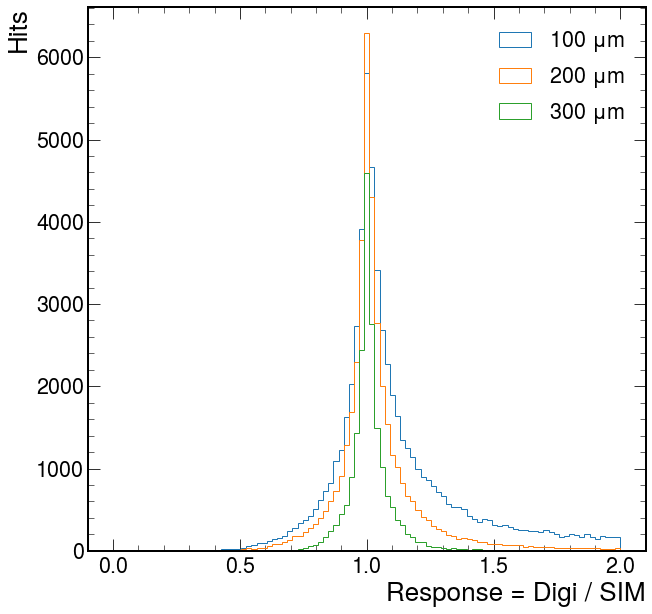

In [10]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])

thickness={0:300,1:200:2:120}
for tid in range(0,3):
    mask=(df['thick']==thick)
    plt.hist( df[mask]['cal_miprec']/df[mask]['mipsim'],               
              bins=np.linspace(0,2,100),
              label=r'{} $\mu$m'.format(thicknes[tidx]),
              histtype='step')
plt.xlabel('Response = Digi / SIM')
plt.ylabel('Hits')
plt.legend()
plt.show()